# Spectral Properties

In [6]:
from datetime import timedelta

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import welch
import seaborn as sns

sns.set()

In [2]:
df_dataset = pd.read_csv('../data/processed/processed_daysahead3_R000.csv', index_col=0)
df_dataset.index = pd.to_datetime(df_dataset.index)
df_dataset.head()

,sigma,Vp_pred,Vp_obs
2010-01-08 06:00:00,68.801098,317.327273,301.767500
2010-01-08 12:00:00,65.147504,328.554545,286.885000
2010-01-08 18:00:00,68.857374,320.569697,283.535000
2010-01-09 00:00:00,64.175179,312.584848,289.951667
2010-01-09 06:00:00,57.276227,304.600000,294.783333


In [13]:
# sampling frequency (Hz)
# infer sampling interval from the index
dt = (df_dataset.index[1] - df_dataset.index[0]).total_seconds() / timedelta(days=27).total_seconds()
fs = 1.0 / dt

# compute PSD with Welch’s method
freqs, psd = welch(df_dataset['sigma'], fs=fs, nperseg=256)

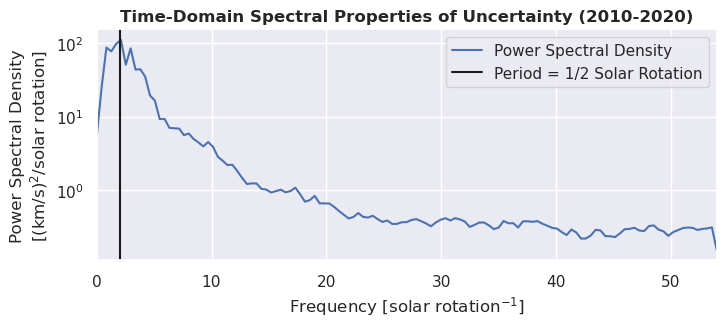

In [33]:
# plot
plt.figure(figsize=(8,3))
plt.semilogy(freqs, psd, label='Power Spectral Density')  # semilog-y is common for PSD
plt.title("Time-Domain Spectral Properties of Uncertainty (2010-2020)", fontweight='bold')
plt.xlabel("Frequency [solar rotation$^{-1}$]")
plt.ylabel("Power Spectral Density\n[(km/s)$^2$/solar rotation]")
plt.axvline(2, color='k', label='Period = 1/2 Solar Rotation')
plt.xlim(0, freqs.max())
plt.legend()
plt.savefig('../plots/spectral_properties.png', dpi=300)